# Visualization of Time Series

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use("seaborn-whitegrid")

## Load time series data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv", index_col="date", parse_dates=["date"])
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


## Simple visualization function

In [3]:
def plot_time_series(df, x, y, title="", xlabel="", ylabel="", color=""):
  plt.figure(figsize=(16,8))
  plt.plot(x, y, color=color)
  plt.title(title, fontsize=18)
  plt.xlabel(xlabel, fontsize=18)
  plt.ylabel(ylabel, fontsize=18)
  plt.show()

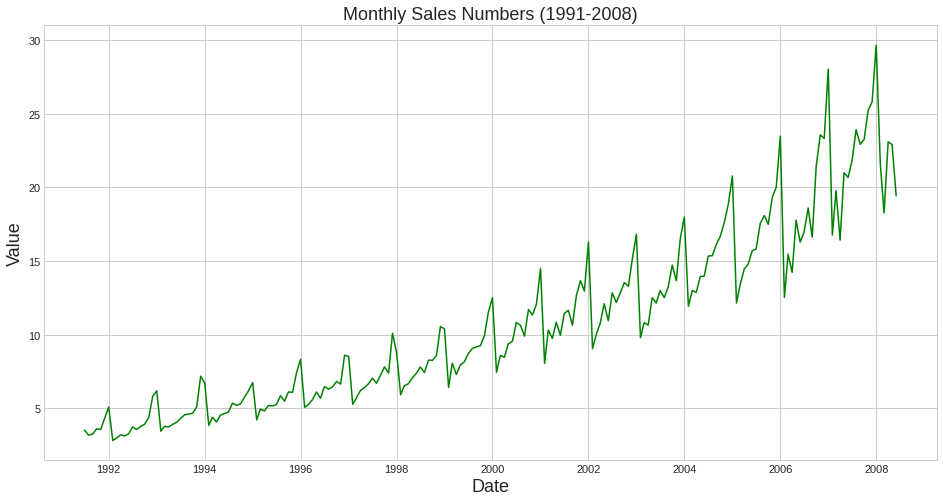

In [4]:
plot_time_series(df, x=df.index, y=df.loc[:, "value"], title="Monthly Sales Numbers (1991-2008)", xlabel="Date", ylabel="Value", color="green")

## Mirroring strictly positive time series

In [5]:
def plot_xmirror_time_series(df, x, y, title="", xlabel="", ylabel="", color=""):
  plt.figure(figsize=(16,8))
  plt.fill_between(x, y1=y, y2=-y, alpha=0.5, linewidth=2, color=color)
  plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=1)
  plt.title(title, fontsize=18)
  plt.xlabel(xlabel, fontsize=18)
  plt.ylabel(ylabel, fontsize=18)
  plt.show()

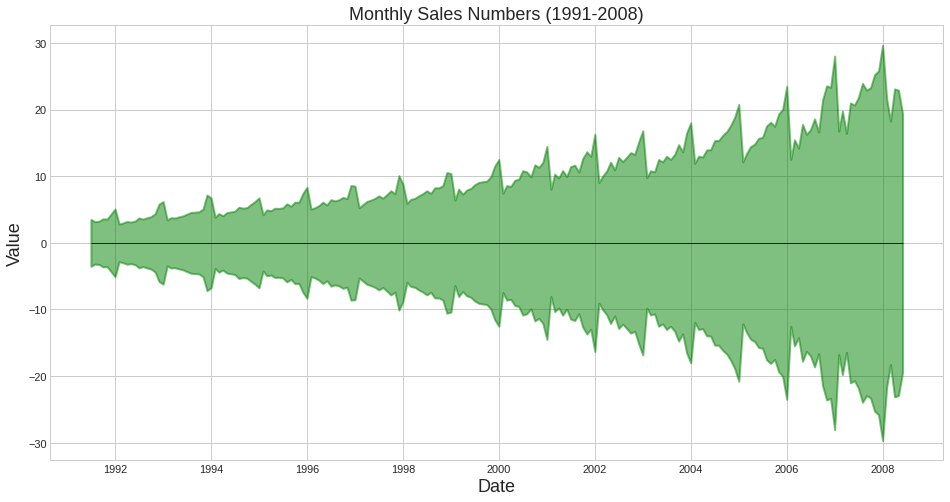

In [6]:
plot_xmirror_time_series(df, x=df.index, y=df.loc[:, "value"], title="Monthly Sales Numbers (1991-2008)", xlabel="Date", ylabel="Value", color="green")

## Seasonal plots

Plot data for each year as a separate line on the same plot to compare year-wise patterns next to each other.

In [7]:
df.reset_index(inplace=True)
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [8]:
df.loc[:, "year"] = df.loc[:, "date"].dt.year
df.loc[:, "month"] = df.loc[:, "date"].dt.month_name().str.slice(stop=3)
df = df.reindex(columns=["date", "year", "month", "value"])
df

,date,year,month,value
0,1991-07-01,1991,Jul,3.526591
1,1991-08-01,1991,Aug,3.180891
2,1991-09-01,1991,Sep,3.252221
3,1991-10-01,1991,Oct,3.611003
4,1991-11-01,1991,Nov,3.565869
...,...,...,...,...
199,2008-02-01,2008,Feb,21.654285
200,2008-03-01,2008,Mar,18.264945
201,2008-04-01,2008,Apr,23.107677
202,2008-05-01,2008,May,22.912510


In [9]:
def plot_seasonal_time_series(df, title="", xlabel="", ylabel="", color=""):
  plt.figure(figsize=(16,8))
  plt.title(title, fontsize=18)
  plt.xlabel(xlabel, fontsize=18)
  plt.ylabel(ylabel, fontsize=18)

  years = df.loc[:, "year"].unique()

  np.random.seed(100)
  my_colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

  for i, year in enumerate(years):
    if i > 0 and i < len(years)-1:
      plt.plot(df.loc[df.loc[:, "year"] == year, "month"], 
              df.loc[df.loc[:, "year"] == year, "value"], 
              color=my_colors[i], 
              label=year)
      
      plt.text(df.loc[df.year==year, :].shape[0]+0.1,
              df.loc[df.year==year, 'value'][:].values[0],
              year,
              fontsize=12,
              color=my_colors[i])

  plt.show()

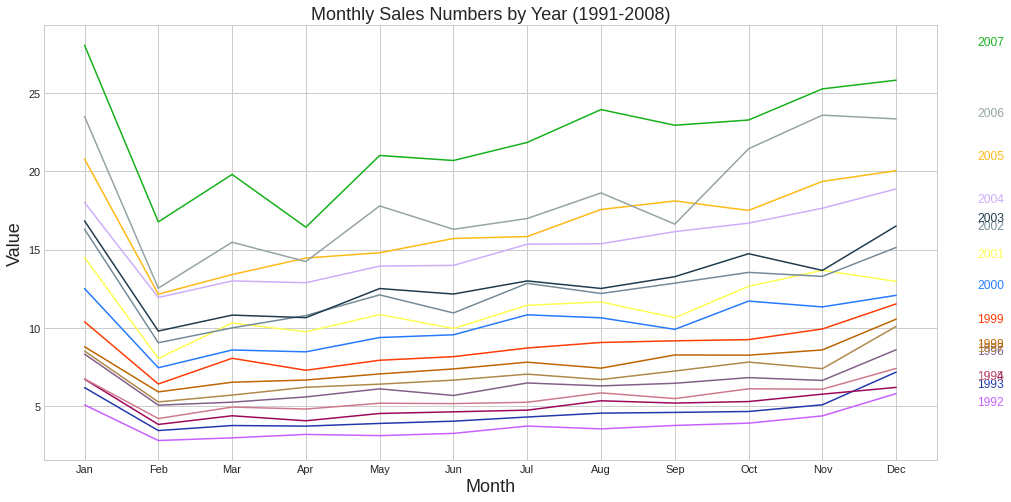

In [10]:
plot_seasonal_time_series(df, title="Monthly Sales Numbers by Year (1991-2008)", xlabel="Month", ylabel="Value", color="green")

Group data at seasonal intervals and inspect how values are distributed within given year or month and how these values progress with time.

In [11]:
def plot_seasonal_box_plots(df):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
  sns.boxplot(x="year", y="value", data=df, ax=axes[0])
  sns.boxplot(x="month", y="value", data=df.loc[~df.loc[:,"year"].isin([1991, 2008])], ax=axes[1])
  axes[0].set_title("Year-wise Box Plot (Trend)", fontsize=18)
  axes[1].set_title("Month-wise Box Plot (Seasonaility)", fontsize=18)
  plt.show()

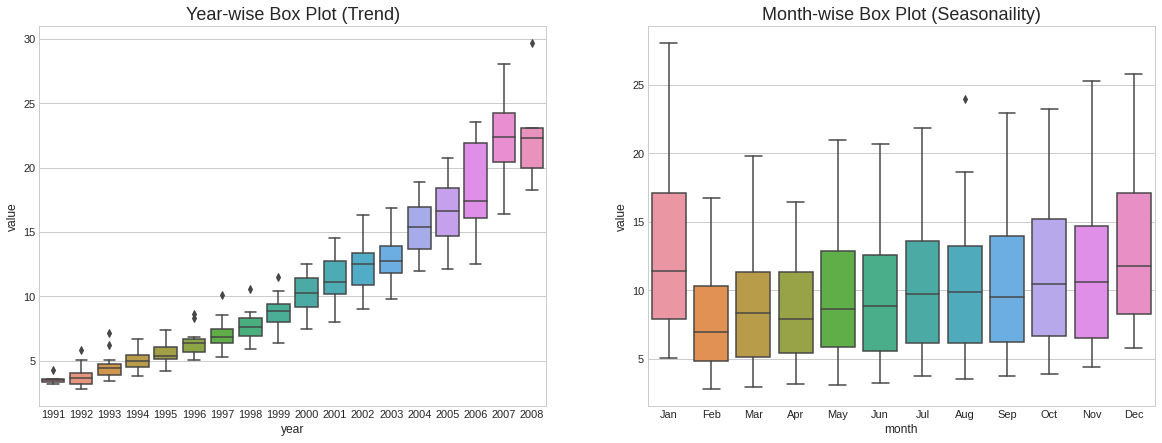

In [12]:
plot_seasonal_box_plots(df)